<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [5]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [6]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [ ]:
#### Read the dataset in the csv file from the URL


In [5]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [6]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [7]:
boston_df.head(10)

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
5,5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,5.21,28.7
6,6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,12.43,22.9
7,7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,19.15,27.1
8,8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,29.93,16.5
9,9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,17.10,18.9


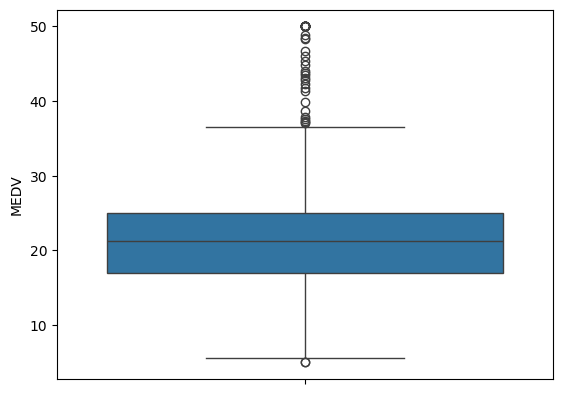

In [9]:
ax=sns.boxplot(y="MEDV", data=boston_df)

<AxesSubplot:xlabel='CHAS'>

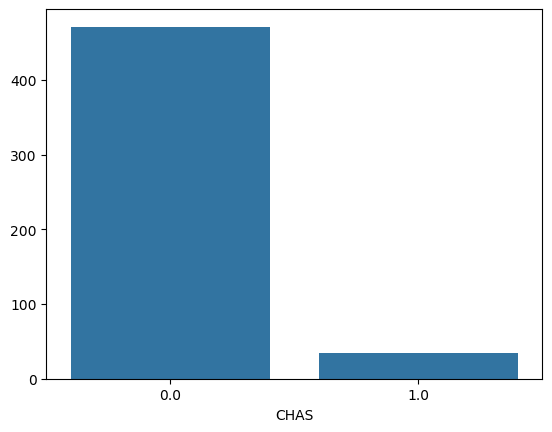

In [12]:
chas_counts = boston_df['CHAS'].value_counts().sort_index()
sns.barplot(x=chas_counts.index, y=chas_counts.values)

<AxesSubplot:xlabel='AGE_GROUP', ylabel='MEDV'>

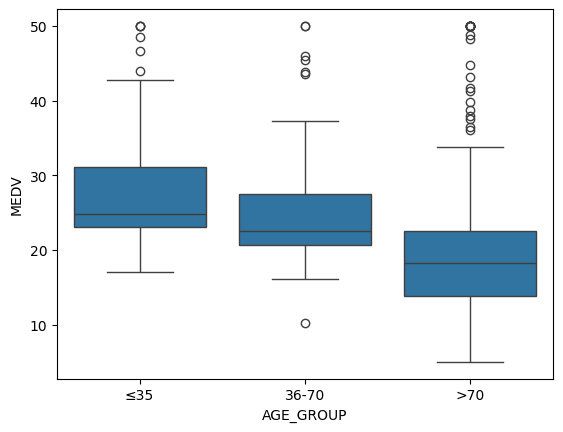

In [15]:
def age_group(age):
    if age <= 35:
        return '≤35'
    elif age <= 70:
        return '36-70'
    else:
        return '>70'

boston_df['AGE_GROUP'] = boston_df['AGE'].apply(age_group)
sns.boxplot(x='AGE_GROUP', y='MEDV', data=boston_df, order=['≤35', '36-70', '>70'])

<AxesSubplot:xlabel='INDUS', ylabel='NOX'>

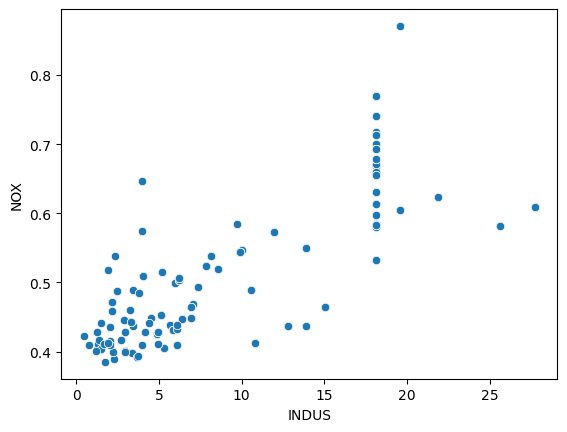

In [16]:
sns.scatterplot(x="INDUS",y="NOX",data=boston_df)

(array([ 15.,   2.,  58.,  15.,  35.,  69.,  76.,  40., 178.,  18.]),
 array([12.6 , 13.54, 14.48, 15.42, 16.36, 17.3 , 18.24, 19.18, 20.12,
        21.06, 22.  ]),
 <BarContainer object of 10 artists>)

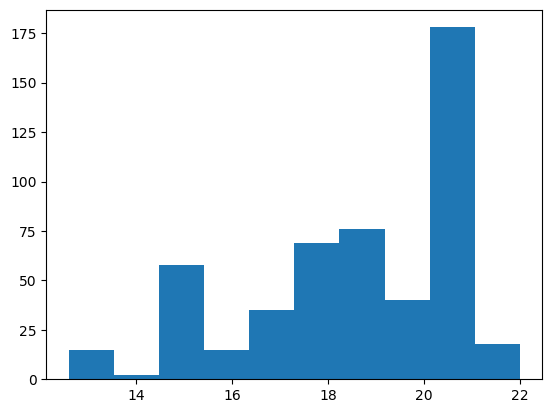

In [17]:
pyplot.hist(boston_df["PTRATIO"])

In [19]:
from scipy.stats import ttest_ind
# Split MEDV by CHAS groups
medv_chas_0 = boston_df[boston_df['CHAS'] == 0]['MEDV']
medv_chas_1 = boston_df[boston_df['CHAS'] == 1]['MEDV']

# Independent samples t-test
t_stat, p_val = ttest_ind(medv_chas_0, medv_chas_1, equal_var=False)
print(f"T-statistic: {t_stat:.4f}, p-value: {p_val:.4f}")


T-statistic: -3.1133, p-value: 0.0036


In [21]:
from scipy.stats import f_oneway

# Categorize AGE into 3 groups
boston_df['AGE_GROUP'] = boston_df['AGE'].apply(age_group)  # reuse from earlier

# Perform one-way ANOVA
group1 = boston_df[boston_df['AGE_GROUP'] == '≤35']['MEDV']
group2 = boston_df[boston_df['AGE_GROUP'] == '36-70']['MEDV']
group3 = boston_df[boston_df['AGE_GROUP'] == '>70']['MEDV']

f_stat, p_val = f_oneway(group1, group2, group3)
print(f"F-statistic: {f_stat:.4f}, p-value: {p_val:.4f}")

F-statistic: 36.4076, p-value: 0.0000


In [22]:
from scipy.stats import pearsonr

r_val, p_val = pearsonr(boston_df['NOX'], boston_df['INDUS'])
print(f"Pearson r: {r_val:.4f}, p-value: {p_val:.4f}")

Pearson r: 0.7637, p-value: 0.0000


In [23]:
import statsmodels.api as sm

X = boston_df[['DIS']]
X = sm.add_constant(X)  # add intercept
y = boston_df['MEDV']

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Fri, 04 Jul 2025   Prob (F-statistic):           1.21e-08
Time:                        14:46:33   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0